In [147]:
import pandas as pd, numpy as np, scipy
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
from tslearn.clustering import KShape
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [148]:
import warnings
import matplotlib.cbook

plt.rcParams.update({'figure.max_open_warning': 0})
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [149]:
df = pd.read_csv("../data/Repayments.csv", delimiter=';')
static = pd.read_csv("../data/Static.csv", delimiter=';')

In [150]:
pivot_scheduled = df.pivot_table(index=['CONTRACT_ID'], columns=['PERIOD_ID'], values=['REPAYMENT_SCHEDULED']).replace(np.nan, 0)
pivot_actual = df.pivot_table(index=['CONTRACT_ID'], columns=['PERIOD_ID'], values=['REPAYMENT_ACTUAL']).replace(np.nan, 0)

In [151]:
pivot_scheduled = pivot_scheduled.loc[:,'REPAYMENT_SCHEDULED'].loc[:,:20]
pivot_actual = pivot_actual.loc[:,'REPAYMENT_ACTUAL']
pivot_scheduled[pivot_actual == 0] = 0

In [152]:
pivot = (pivot_actual - pivot_scheduled) / np.array([static.set_index('CONTRACT_ID').loc[pivot_scheduled.index.values]['CONTRACT_SUM'] for i in range(20)]).T

In [153]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(pivot.values)

# Euclidean k-means

Resumed because of empty cluster
Resumed because of empty cluster
0.209 --> 0.209 --> 


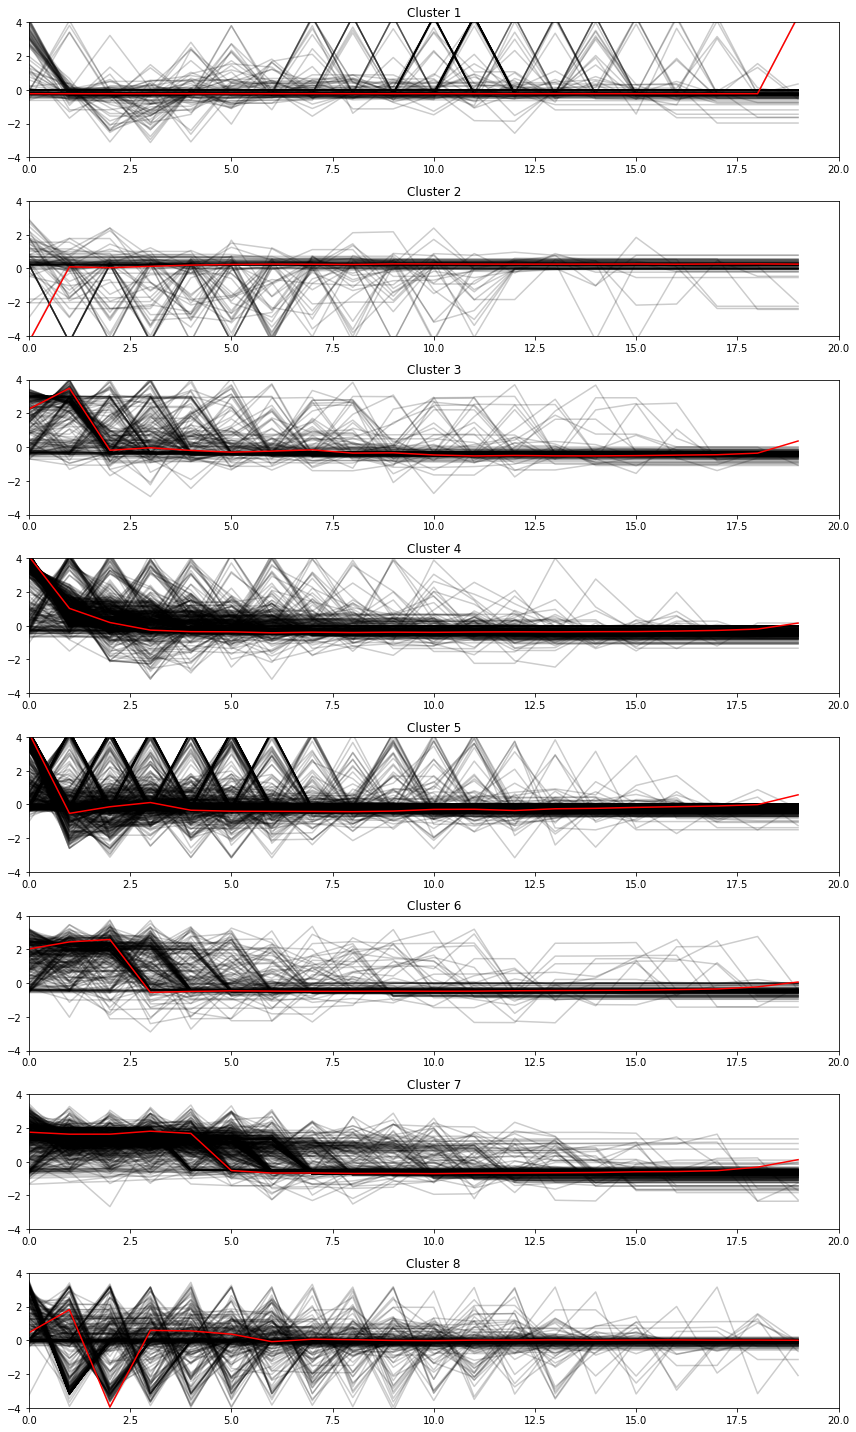

In [27]:
n_clasters = 8
sz = X_train.shape[1]
seed = 13
# Euclidean k-means
ks = KShape(n_clusters=n_clasters, verbose=True, random_state=seed)
y_pred = ks.fit_predict(X_train)


plt.figure(figsize=(12, 20),)
for yi in range(n_clasters):
    plt.subplot(n_clasters, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()

# Kernel k-means

Init 1
6933.940 --> 5685.455 --> 5492.859 --> 5425.305 --> 5312.268 --> 4861.727 --> 4804.781 --> 4803.661 --> 4816.230 --> 4819.366 --> 4822.329 --> 4823.753 --> 4824.387 --> 4825.397 --> 4825.951 --> 4826.693 --> 4827.438 --> 4827.693 --> 4827.693 --> 
Init 2
6927.828 --> 5656.951 --> 5210.051 --> 5073.594 --> 5054.674 --> 5056.234 --> 5056.841 --> 5061.086 --> 5059.667 --> 5055.707 --> 5052.368 --> 5043.095 --> 5037.163 --> 5021.095 --> 5004.352 --> 5001.762 --> 5008.590 --> 5013.151 --> 5012.761 --> 5012.442 --> 5012.452 --> 5012.027 --> 5011.326 --> 5010.498 --> 5009.284 --> 5007.645 --> 5006.340 --> 5005.684 --> 5005.128 --> 5005.259 --> 5005.259 --> 
Init 3
6932.196 --> 5181.716 --> 5007.656 --> 5000.883 --> 4997.021 --> 5004.661 --> 5004.086 --> 4990.058 --> 4956.129 --> 4947.547 --> 4942.412 --> 4940.284 --> 4940.771 --> 4940.694 --> 4941.472 --> 4943.190 --> 4944.252 --> 4944.092 --> 4944.998 --> 4945.805 --> 4946.879 --> 4947.534 --> 4948.751 --> 4949.101 --> 4949.116 --> 49

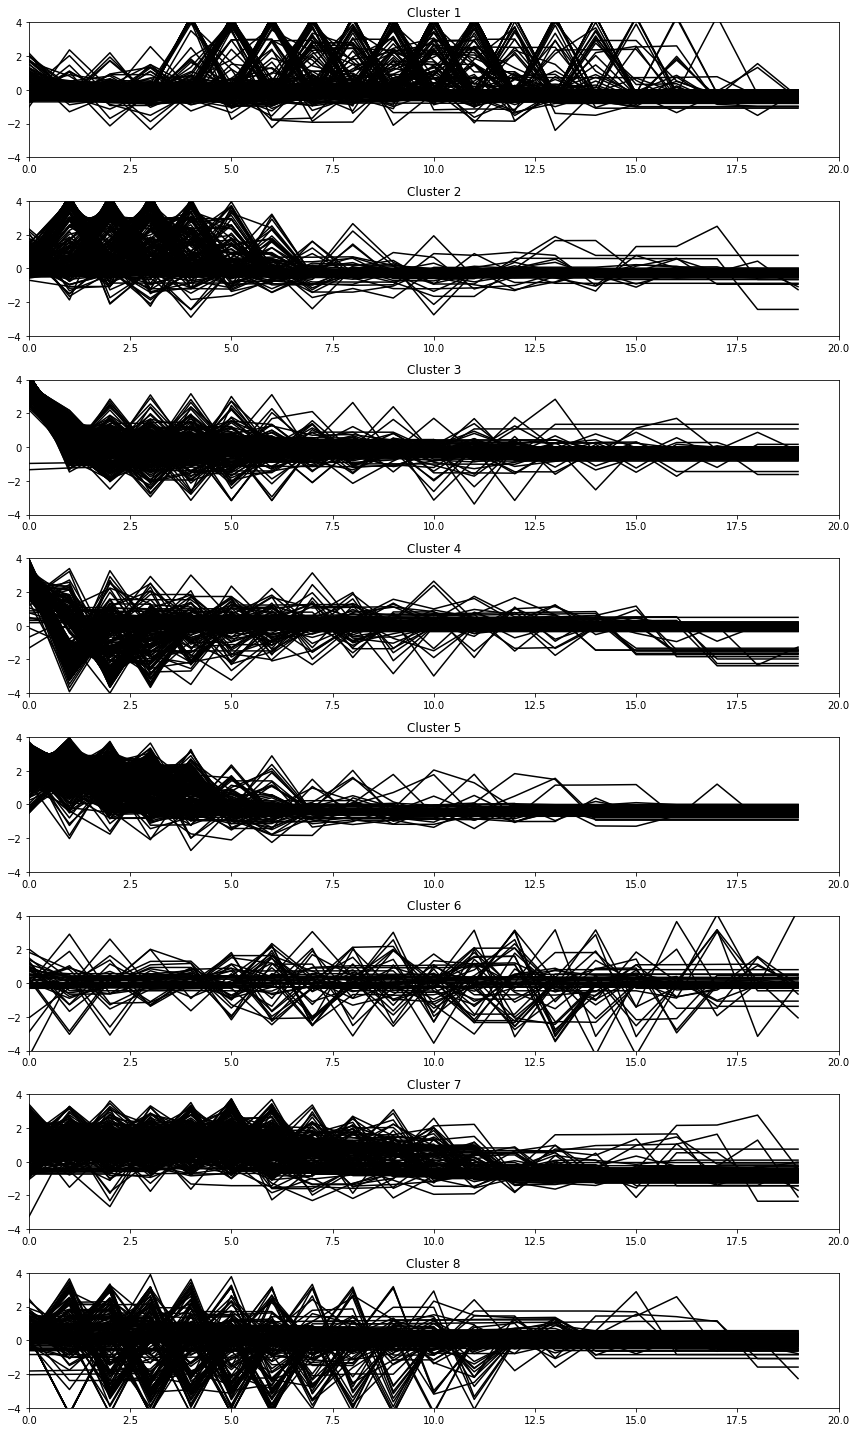

In [39]:
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import GlobalAlignmentKernelKMeans
from tslearn.metrics import sigma_gak, cdist_gak
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

n_clasters = 8
seed = 0
numpy.random.seed(seed)
numpy.random.shuffle(X_train)
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)  # Keep only 50 time series
sz = X_train.shape[1]

gak_km = GlobalAlignmentKernelKMeans(n_clusters=n_clasters, sigma=sigma_gak(X_train), n_init=20, verbose=True, random_state=seed)
y_pred = gak_km.fit_predict(X_train)

plt.figure(figsize=(12, 20))
for yi in range(n_clasters):
    plt.subplot(n_clasters, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()

In [ ]:
n_clasters = 8

In [137]:
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])  # Keep only 50 time series
sz = X_train.shape[1]

Euclidean k-means
7.582 --> 6.824 --> 6.673 --> 6.629 --> 6.612 --> 6.603 --> 6.599 --> 6.596 --> 6.594 --> 6.593 --> 6.591 --> 6.571 --> 6.565 --> 6.564 --> 6.563 --> 6.563 --> 6.562 --> 6.562 --> 6.562 --> 6.562 --> 6.562 --> 


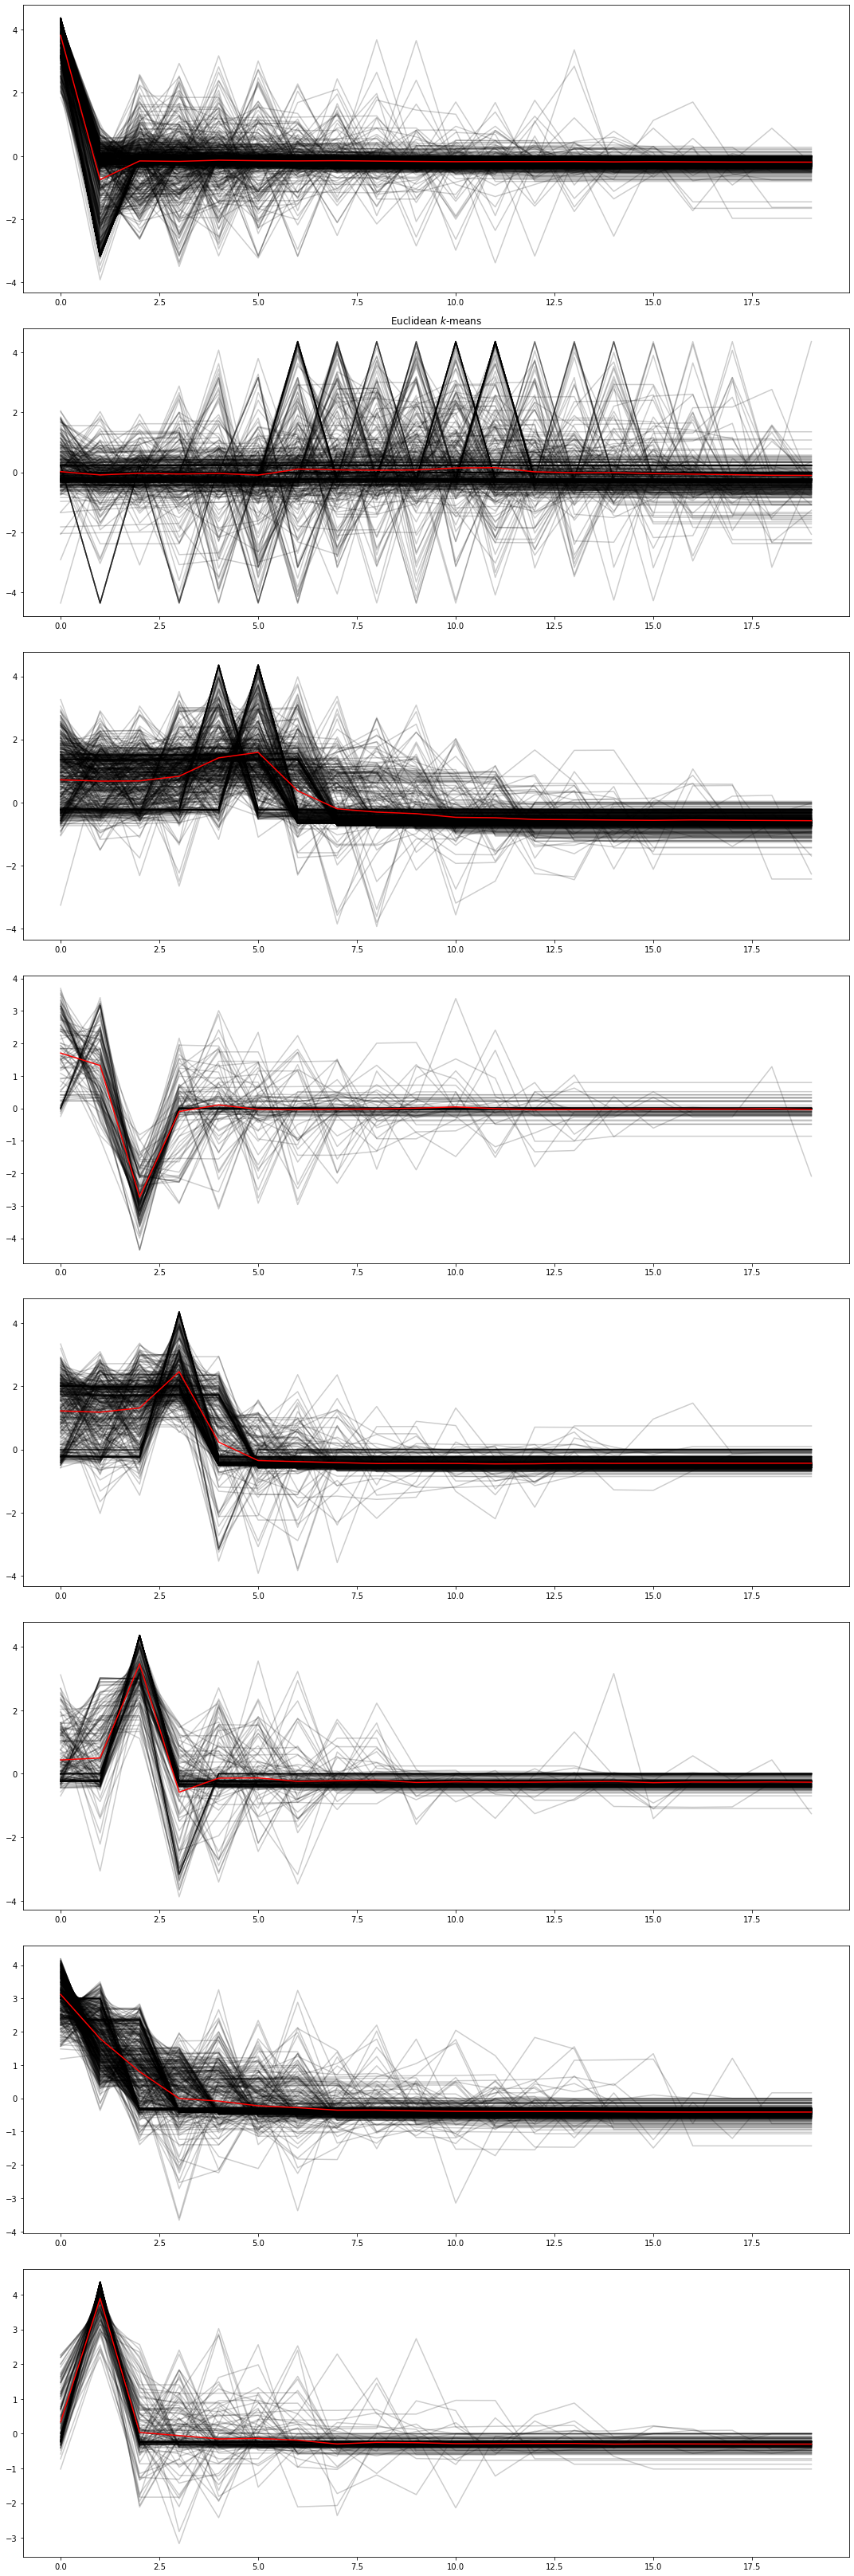

In [62]:
# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=n_clasters, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure(figsize=(15,45))
for yi in range(n_clasters):
    plt.subplot(n_clasters, 1, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    if yi == 1:
        plt.title("Euclidean $k$-means")


plt.tight_layout()
plt.show()

DBA k-means
Init 1
3.631 --> 2.968 --> 2.906 --> 2.842 --> 2.820 --> 2.797 --> 2.788 --> 2.769 --> 2.751 --> 2.736 --> 2.724 --> 2.718 --> 2.715 --> 2.713 --> 2.711 --> 2.710 --> 2.708 --> 2.707 --> 2.706 --> 2.705 --> 2.704 --> 2.703 --> 2.703 --> 2.702 --> 2.701 --> 2.701 --> 2.700 --> 2.700 --> 2.699 --> 2.699 --> 2.699 --> 2.698 --> 2.698 --> 2.698 --> 2.698 --> 2.698 --> 2.698 --> 2.698 --> 2.697 --> 2.697 --> 2.696 --> 2.695 --> 2.694 --> 2.686 --> 2.597 --> 2.571 --> 2.564 --> 2.563 --> 2.562 --> 2.562 --> 
Init 2
4.845 --> 3.145 --> 2.925 --> 2.884 --> 2.844 --> 2.802 --> 2.782 --> 2.777 --> 2.775 --> 2.775 --> 2.774 --> 2.774 --> 2.774 --> 2.774 --> 2.774 --> 2.774 --> 


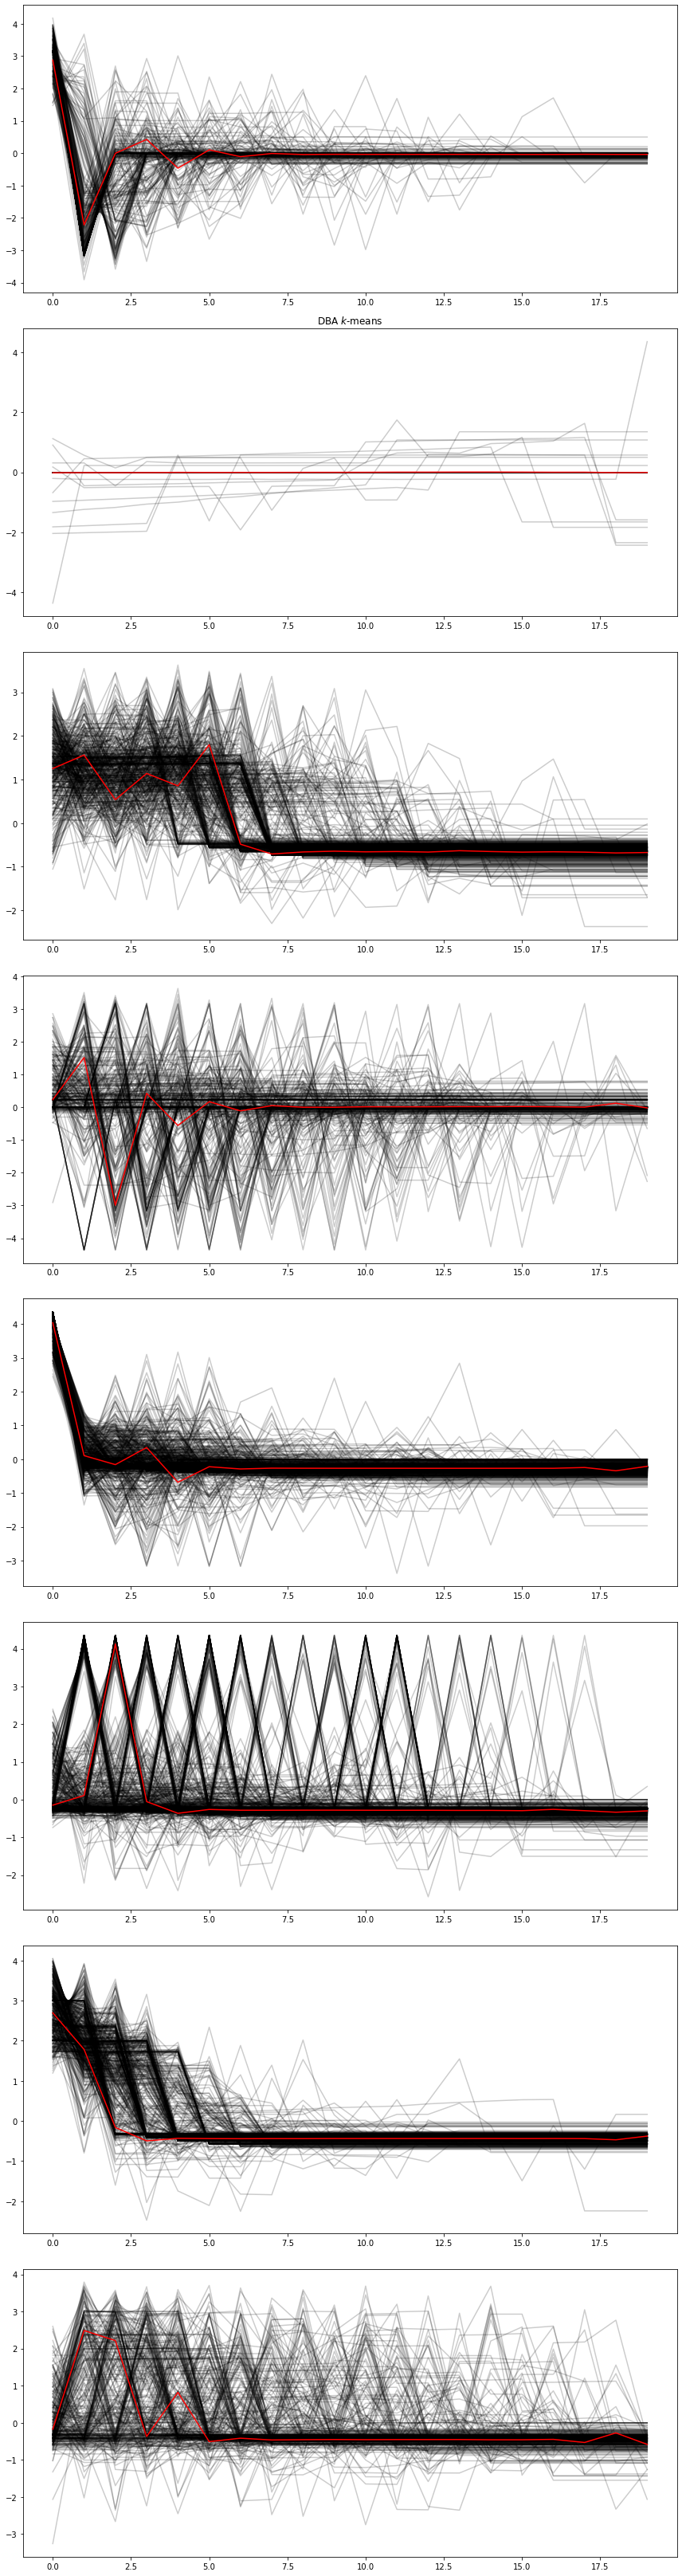

In [63]:

# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=n_clasters, n_init=2, metric="dtw", verbose=True, max_iter_barycenter=10, random_state=seed)
y_pred = dba_km.fit_predict(X_train)


plt.figure(figsize=(12,45))

for yi in range(n_clasters):
    plt.subplot(n_clasters, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    if yi == 1:
        plt.title("DBA $k$-means")


plt.tight_layout()
plt.show()

Soft-DTW k-means
34.230 --> 20.776 --> 19.656 --> 18.264 --> 17.755 --> 17.503 --> 17.277 --> 17.176 --> 17.086 --> 17.030 --> 16.993 --> 16.965 --> 16.906 --> 16.847 --> 16.704 --> 16.575 --> 16.456 --> 16.346 --> 16.233 --> 16.190 --> 16.119 --> 16.074 --> 16.031 --> 16.046 --> 16.042 --> 16.026 --> 16.009 --> 16.005 --> 16.009 --> 16.018 --> 16.022 --> 16.030 --> 16.038 --> 16.039 --> 16.041 --> 16.057 --> 16.057 --> 16.056 --> 16.053 --> 16.062 --> 16.064 --> 16.065 --> 16.065 --> 16.067 --> 16.067 --> 16.067 --> 16.067 --> 16.068 --> 16.067 --> 16.068 --> 


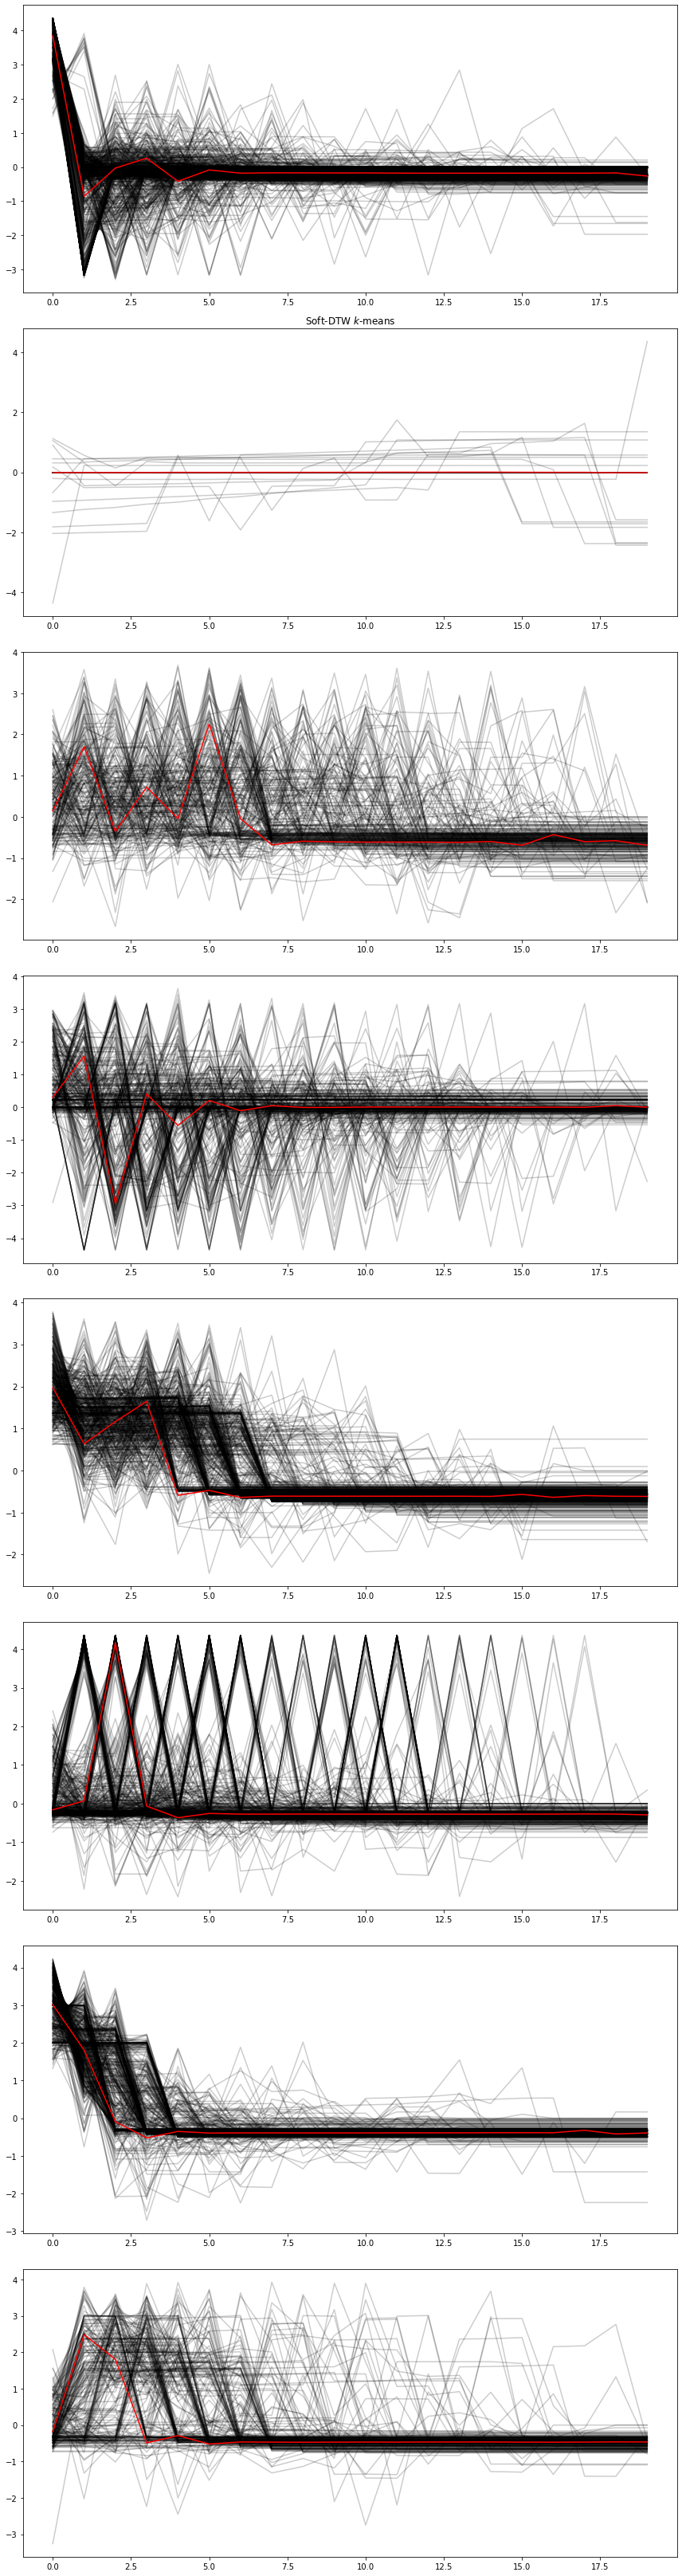

In [159]:
# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=n_clasters, metric="softdtw", metric_params={"gamma_sdtw": .01},
                           verbose=True, random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)


plt.figure(figsize=(12,45))


for yi in range(n_clasters):
    plt.subplot(n_clasters, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    if yi == 1:
        plt.title("Soft-DTW $k$-means")
        
        
plt.tight_layout()
plt.show()

In [202]:
dataset = pd.DataFrame()
dataset['CONTRACT_ID'] = pivot.index
dataset['sdtw_km'] = sdtw_km.predict(X_train)
dataset['dba_km'] = dba_km.predict(X_train)
dataset['km'] = km.predict(X_train)
dataset['gak_km'] = gak_km.predict(X_train)
dataset['ks'] = ks.predict(X_train)
dataset.to_csv("data.csv",index=False)

In [204]:
dataset.head()

CONTRACT_ID  sdtw_km  dba_km  km  gak_km  ks
0     17228104        7       7   2       0   2
1     17237409        5       5   1       0   0
2     17276280        5       5   1       0   0
3     17282809        5       5   2       0   4
4     17283247        5       5   1       5   0